# Exploratory Data Analysis (EDA)

## Introduction

This project analyzes a credit card customer dataset to predict the likelihood of a customer defaulting on their next month's payment. The dataset contains information on customers' demographics, credit history, and financial behavior, such as:
* **Demographics:** Gender, education level, marital status, and age. 
* **Credit and Payment Details:** Credit limit, past payment behavior, and historical bill amounts. 
* **Payment Status:** Whether the customer defaulted on their next payment (default.payment.next.month). 

The objective of this project is to build a predictive model to classify customers into two categories: default or non-default, enabling financial institutions to mitigate credit risk effectively. The insights derived can help optimize credit policies, reduce losses, and improve customer relationship management.

## Load Data

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Load Dataset
data_credit_card = pd.read_csv('C:/Users/user/Documents/PROJECTS/DATA SCIENCE PROJECTS/CREDIT CARD FRAUD DETECTION/credit.csv') 
data_credit_card.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Dataset Overview


In [7]:
print(data_credit_card.info())
print(data_credit_card.describe())
print(data_credit_card['default.payment.next.month'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

## Data Visualizations

* **Histograms:** To understand the distribution of LIMIT_BAL (credit limit) and AGE.

* **Scatter Plots:** To explore the relationship between important features (LIMIT_BAL, PAY_AMT1, and AGE) and the target variable (default.payment.next.month).

* **Box Plots:** To convey the comparison of payment behavior and bill amounts across the two target categories (default or non-default).

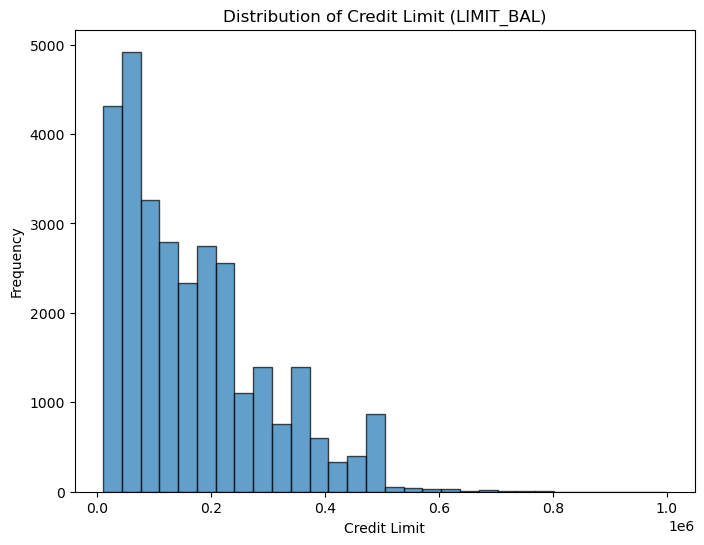

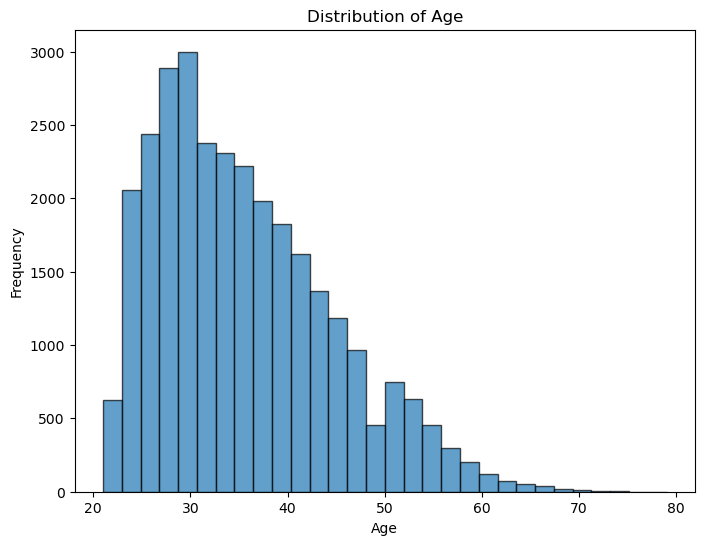

In [8]:
# Histogram: Distribution of Credit Limit
plt.figure(figsize=(8, 6))
plt.hist(data_credit_card['LIMIT_BAL'], bins=30, edgecolor='black', alpha=0.7)
plt.title("Distribution of Credit Limit (LIMIT_BAL)")
plt.xlabel("Credit Limit")
plt.ylabel("Frequency")
plt.show()

# Histogram: Distribution of Age
plt.figure(figsize=(8, 6))
plt.hist(data_credit_card['AGE'], bins=30, edgecolor='black', alpha=0.7)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

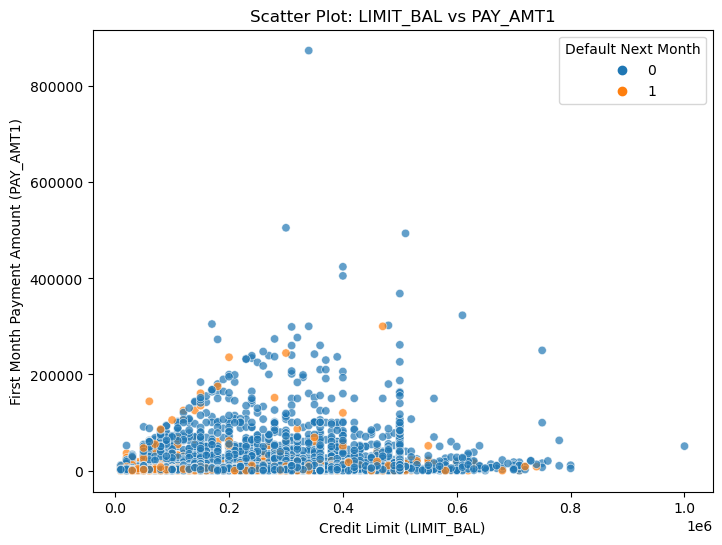

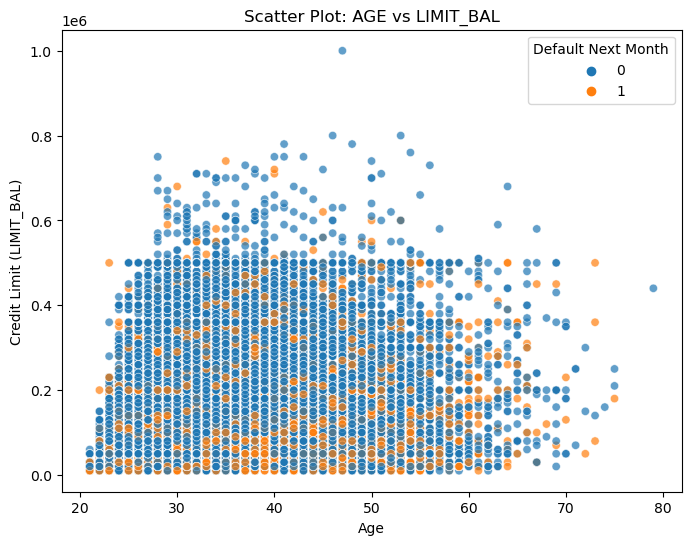

In [9]:
# Scatter Plots: "Exploring Relationships: Credit Limit & Payment Amount, Age & Credit Limit"
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_credit_card, x='LIMIT_BAL', y='PAY_AMT1', hue='default.payment.next.month', alpha=0.7)
plt.title("Scatter Plot: LIMIT_BAL vs PAY_AMT1")
plt.xlabel("Credit Limit (LIMIT_BAL)")
plt.ylabel("First Month Payment Amount (PAY_AMT1)")
plt.legend(title="Default Next Month", loc='upper right')
plt.show()

# Scatter Plot: Age vs Credit Limit
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_credit_card, x='AGE', y='LIMIT_BAL', hue='default.payment.next.month', alpha=0.7)
plt.title("Scatter Plot: AGE vs LIMIT_BAL")
plt.xlabel("Age")
plt.ylabel("Credit Limit (LIMIT_BAL)")
plt.legend(title="Default Next Month", loc='upper right')
plt.show()

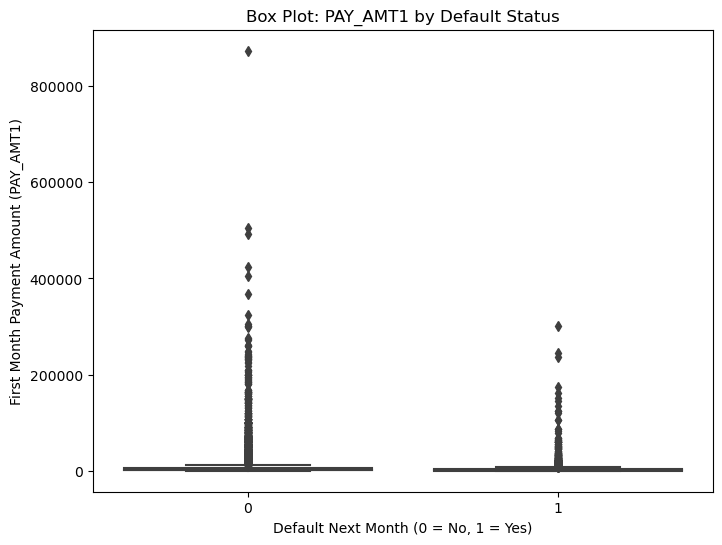

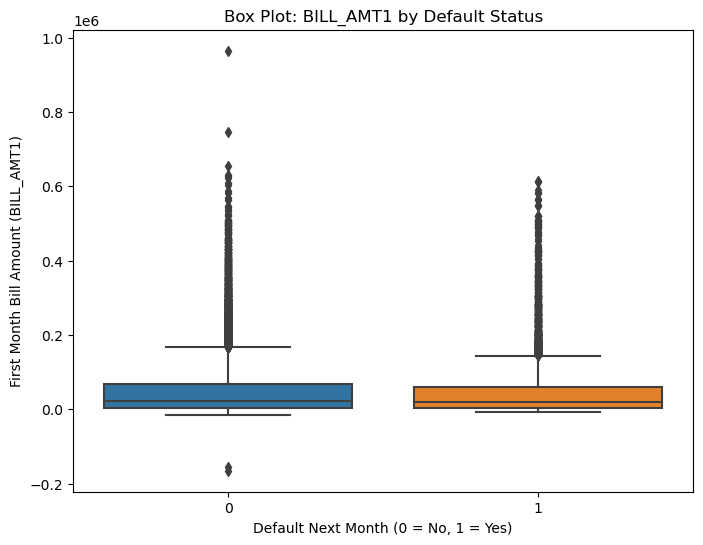

In [10]:
# Box Plot: PAY_AMT1 by Default Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_credit_card, x='default.payment.next.month', y='PAY_AMT1')
plt.title("Box Plot: PAY_AMT1 by Default Status")
plt.xlabel("Default Next Month (0 = No, 1 = Yes)")
plt.ylabel("First Month Payment Amount (PAY_AMT1)")
plt.show()

# Box Plot: BILL_AMT1 by Default Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_credit_card, x='default.payment.next.month', y='BILL_AMT1')
plt.title("Box Plot: BILL_AMT1 by Default Status")
plt.xlabel("Default Next Month (0 = No, 1 = Yes)")
plt.ylabel("First Month Bill Amount (BILL_AMT1)")
plt.show()

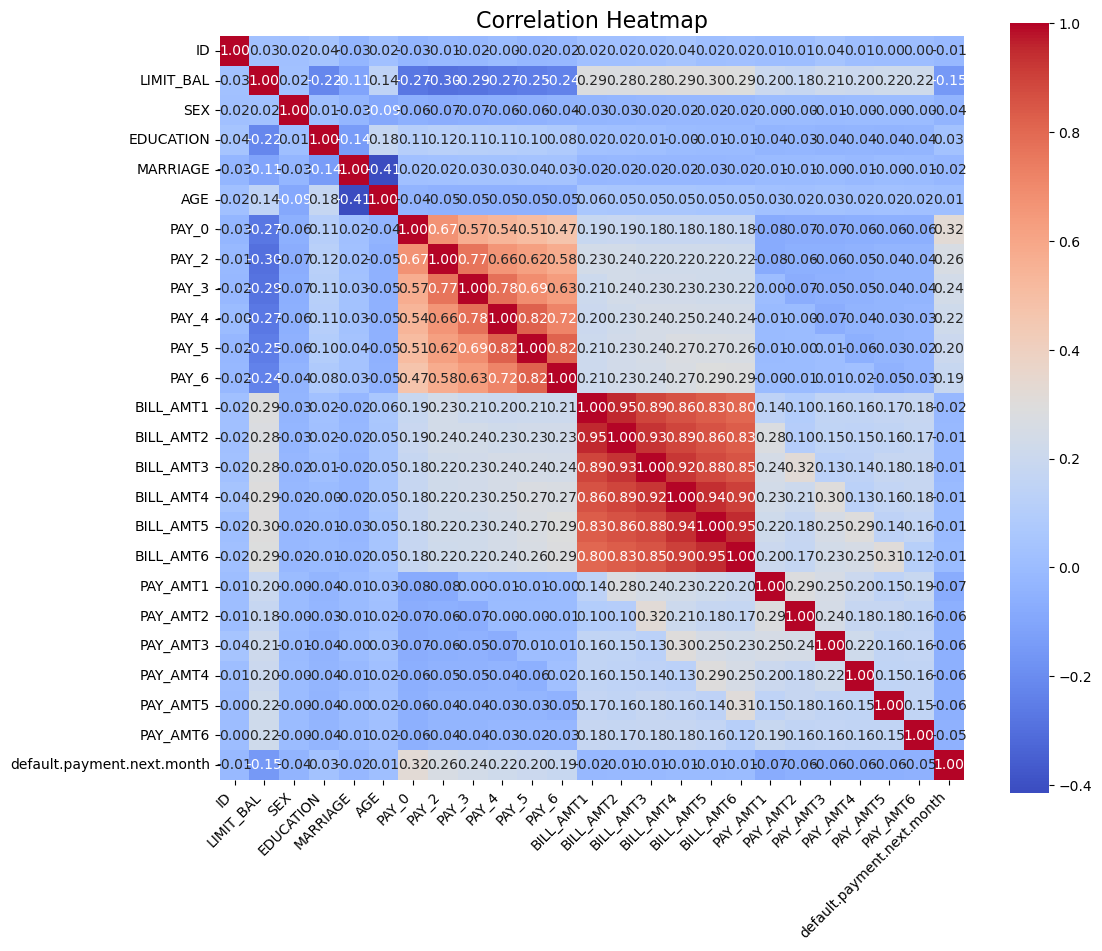

In [11]:
# Calculate the correlation matrix
correlation_matrix = data_credit_card.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Key Insights from the Correlation Matrix on Credit Card Default Risk

This makes it clear that the section provides a summary of important findings related to default risk based on the correlation matrix.
The correlation matrix shows the relationships between credit card customer attributes and default risk. Key insights include:

- **LIMIT_BAL (Credit Limit)** is negatively correlated with default risk (-0.15), suggesting higher credit limits may reduce default probability.
- **PAY_0 to PAY_6 (Repayment Statuses)** have the strongest positive correlations with default risk, especially **PAY_0 (0.32)**, indicating late payments increase default likelihood.
- **BILL_AMT (Bill Amounts)** and **PAY_AMT (Payment Amounts)** have weak correlations with default risk, implying payment history is a stronger predictor than outstanding balances.
- **Demographic features (AGE, SEX, EDUCATION, MARRIAGE)** show minimal correlation with default, indicating financial behavior is a better determinant.